In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/indira/Documents/Indira/Kaggle/MNIST/')

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()
train_data.shape

(42000, 785)

In [6]:
train_labels =  train_data['label']

In [7]:
train_data = train_data.drop(axis=1,columns=['label'])

In [8]:
train_data.shape

(42000, 784)

In [9]:
def display_digit(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_data.iloc[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [10]:
type(train_data)

pandas.core.frame.DataFrame

In [11]:
pixels = np.array(train_data, dtype='uint8')


In [12]:
type(pixels)

numpy.ndarray

In [13]:
pixels.shape

(42000, 784)

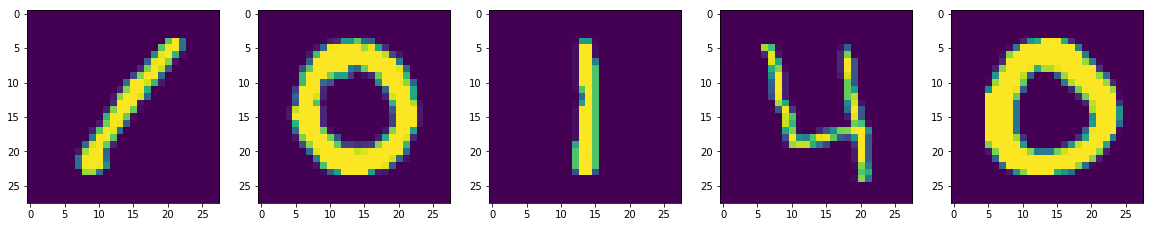

In [14]:
fig = plt.figure()
fig.set_size_inches(20,20)
for i in np.arange(0,5) :
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow(pixels[i].reshape((28,28)))

In [15]:
## normalize  
pixels = pixels/255

In [16]:
np.min(pixels)

0.0

In [17]:
## Prepare for runnin logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [19]:
?train_test_split()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.33, random_state=42)

In [21]:
model = LogisticRegression()


In [22]:
model = model.fit(X_train,y=y_train)

In [23]:
y_test_predicted = model.predict(X_test)

In [26]:
y_test_predicted[1:10]

array([1, 9, 9, 8, 6, 2, 2, 7, 1])

In [27]:
y_test[1:10]

38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
30743    7
6839     1
Name: label, dtype: int64

In [29]:
accuracy_score(y_test,y_test_predicted)

0.9

In [35]:
recall_score(y_pred=y_test_predicted,y_true= y_test,average=None)

array([0.95948987, 0.95460526, 0.84512023, 0.8735554 , 0.91458027,
       0.83817427, 0.94345025, 0.9027027 , 0.87481259, 0.88353116])

In [36]:
precision_score(y_test,y_test_predicted,average=None)

array([0.94113319, 0.91951838, 0.8958021 , 0.88316151, 0.90327273,
       0.86546701, 0.93674485, 0.93361286, 0.83357143, 0.87961595])